In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar



In [3]:
#read datasets of each month

dataset_jan=pd.read_csv("1_2023_113.csv")
dataset_feb=pd.read_csv("2_2023_113.csv")
dataset_mar=pd.read_csv("3_2023_113.csv")
dataset_apr=pd.read_csv("4_2023_113.csv")
dataset_may=pd.read_csv("5_2023_113.csv")
dataset_jun=pd.read_csv("6_2023_113.csv")


In [4]:
dataset_jan.shape

(36157, 41)

In [5]:
#combine all monthly datasets
dataset=pd.concat([dataset_jan,dataset_feb,dataset_mar,dataset_apr,dataset_may,dataset_jun],ignore_index=True)
dataset

,bulk_id,car_reg_no,vehicle_speed,heading,distance,altitude,o_s1_b1_voltage,o_s2_b2_voltage,o_s1_current,calculated_engine_load,...,egr_error,absolute_barometric_pressure,engine_coolant_temperature,intake_air_temperature,catalyst_temperature_b1_s1,catalyst_temperature_b1_s2,ambient_air_temperature,time_stamp,latitude,longitude
0,6266061,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:10,0.000000,0.00000
1,6266060,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:08,0.000000,0.00000
2,6266059,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:06,0.000000,0.00000
3,6266058,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:03,0.000000,0.00000
4,6266057,113,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-01-30 23:17:01,0.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212500,6463303,113,0.0,0.0,NaN,0.0,NaN,0.78,0.0,60.7843,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-03 20:23:57,0.000000,0.00000
212501,6463302,113,0.0,0.0,NaN,5.1,NaN,0.78,0.0,60.7843,...,NaN,99.0,91.0,47.0,0.0,0.0,35.0,2023-06-03 20:23:55,24.925262,67.10289
212502,6463301,113,0.0,0.0,NaN,5.1,NaN,0.80,0.0,61.1765,...,NaN,99.0,91.0,47.0,0.0,0.0,35.0,2023-06-03 20:23:53,24.925262,67.10289
212503,6463300,113,0.0,0.0,NaN,0.0,NaN,0.80,0.0,61.1765,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,2023-06-03 20:23:51,0.000000,0.00000


In [6]:
dataset["engine_coolant_temperature"].isnull().sum() #no null values in engine coolant temperature


np.int64(0)

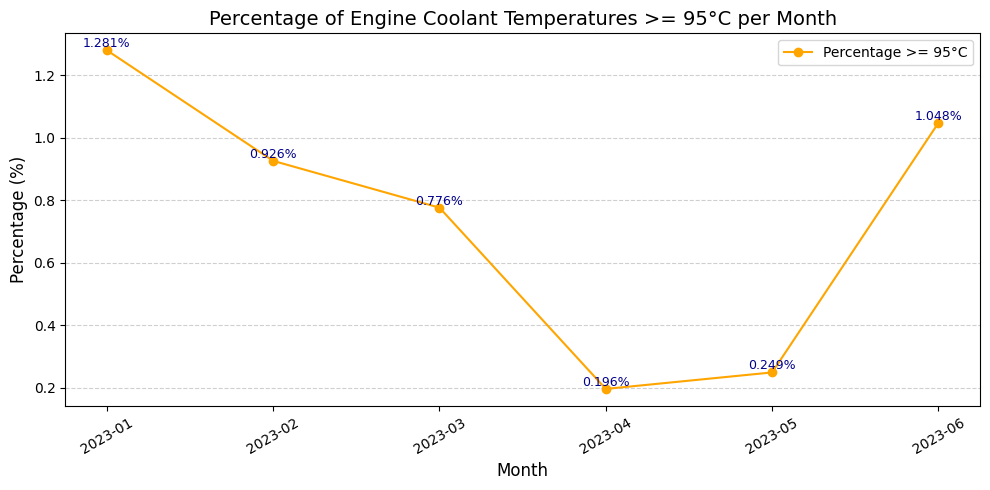

     month  total_entries  count_over_95  percentage_over_95
0  2023-01          36157            463            1.280527
1  2023-02          26666            247            0.926273
2  2023-03          38641            300            0.776377
3  2023-04          31671             62            0.195763
4  2023-05          44252            110            0.248576
5  2023-06          35118            368            1.047896


In [7]:
#this code is for month-wise

# Ensure the 'time_stamp' column is datetime type
dataset['time_stamp'] = pd.to_datetime(dataset['time_stamp'])

# Extract the month and year for grouping
dataset['month'] = dataset['time_stamp'].dt.to_period('M')

# Group by month
monthly_data = dataset.groupby('month').agg(
    total_entries=('engine_coolant_temperature', 'count'),
    count_over_95=('engine_coolant_temperature', lambda x: (x >= 95).sum())
).reset_index()

# Calculate percentage
monthly_data['percentage_over_95'] = (monthly_data['count_over_95'] / monthly_data['total_entries']) * 100


plt.figure(figsize=(10, 5))

# Plot the percentage line
plt.plot(
    monthly_data['month'].astype(str),
    monthly_data['percentage_over_95'],
    marker='o',
    color='orange',
    label='Percentage >= 95°C'
)
# Annotate each point with the percentage value
for x, y in zip(monthly_data['month'].astype(str), monthly_data['percentage_over_95']):
    plt.text(
        x, y + 0.01,  # Adjust position slightly above the point
        f"{y:.3f}%", 
        ha='center',
        fontsize=9, 
        color='darkblue'
    )

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Customize labels, title, and legend
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Percentage of Engine Coolant Temperatures >= 95°C per Month', fontsize=14)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()
# Print the table for reference
print(monthly_data)


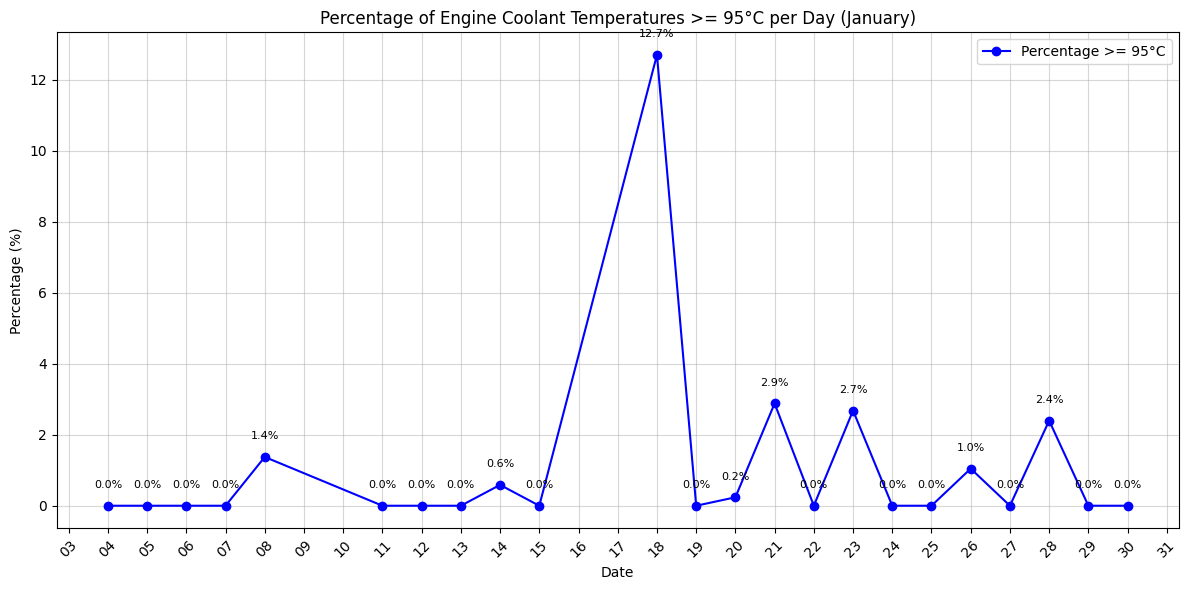

          date  total_Entries  count_over_or_equal_95  \
0   2023-01-04            707                       0   
1   2023-01-05            338                       0   
2   2023-01-06           1508                       0   
3   2023-01-07            490                       0   
4   2023-01-08           1602                      22   
5   2023-01-11            934                       0   
6   2023-01-12            861                       0   
7   2023-01-13           1591                       0   
8   2023-01-14           2726                      16   
9   2023-01-15             10                       0   
10  2023-01-18           1764                     224   
11  2023-01-19            958                       0   
12  2023-01-20           3790                       9   
13  2023-01-21            937                      27   
14  2023-01-22           1662                       0   
15  2023-01-23            970                      26   
16  2023-01-24           1539  

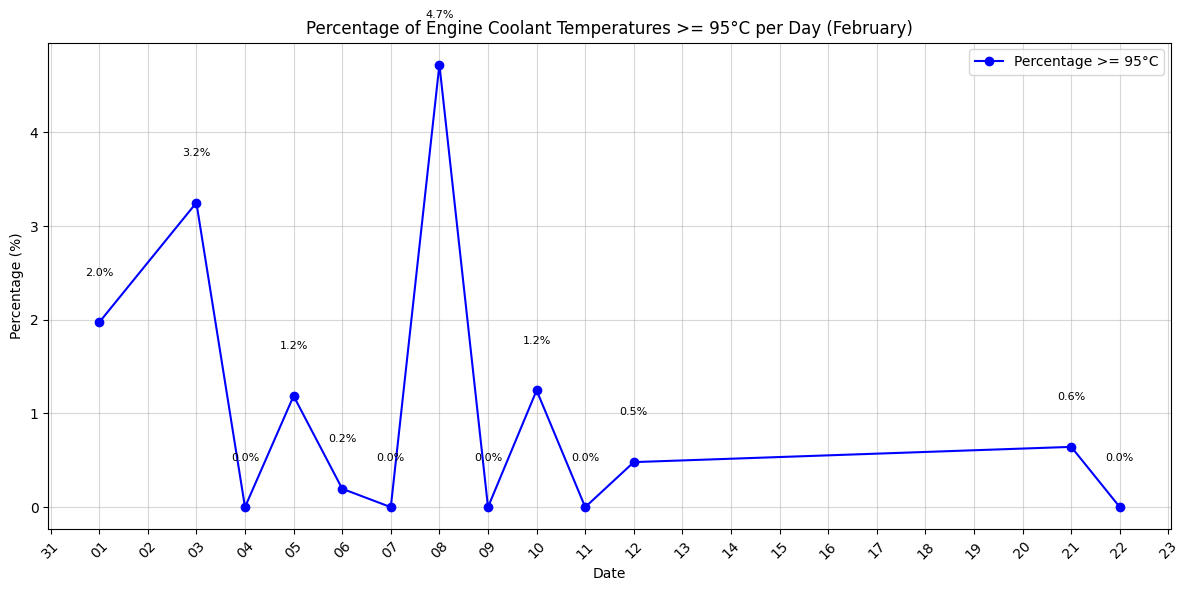

          date  total_Entries  count_over_or_equal_95  \
0   2023-02-01           3046                      60   
1   2023-02-03           1140                      37   
2   2023-02-04           3676                       0   
3   2023-02-05            928                      11   
4   2023-02-06           3058                       6   
5   2023-02-07           2820                       0   
6   2023-02-08           1823                      86   
7   2023-02-09            694                       0   
8   2023-02-10           1767                      22   
9   2023-02-11           1953                       0   
10  2023-02-12           3541                      17   
11  2023-02-21           1245                       8   
12  2023-02-22            975                       0   

    percentage_over_or_equal_95  
0                      1.969796  
1                      3.245614  
2                      0.000000  
3                      1.185345  
4                      0.196207

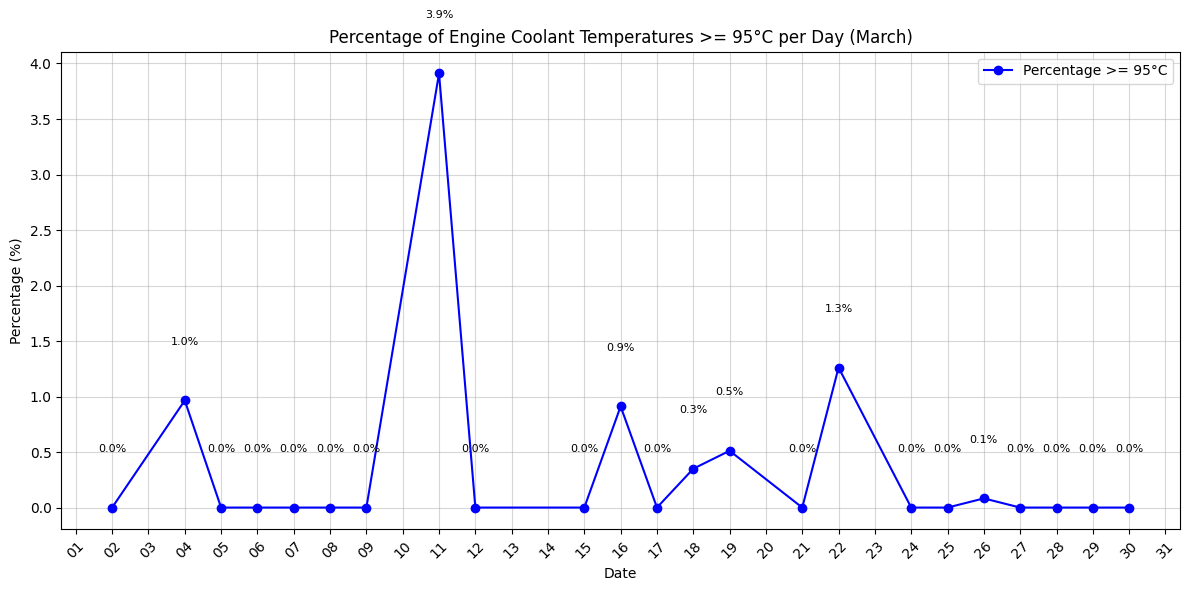

          date  total_Entries  count_over_or_equal_95  \
0   2023-03-02            323                       0   
1   2023-03-04            933                       9   
2   2023-03-05           1002                       0   
3   2023-03-06           1987                       0   
4   2023-03-07            420                       0   
5   2023-03-08           1278                       0   
6   2023-03-09            853                       0   
7   2023-03-11           5191                     203   
8   2023-03-12            452                       0   
9   2023-03-15           1779                       0   
10  2023-03-16           2413                      22   
11  2023-03-17            906                       0   
12  2023-03-18           7436                      26   
13  2023-03-19           4495                      23   
14  2023-03-21           1738                       0   
15  2023-03-22           1269                      16   
16  2023-03-24            452  

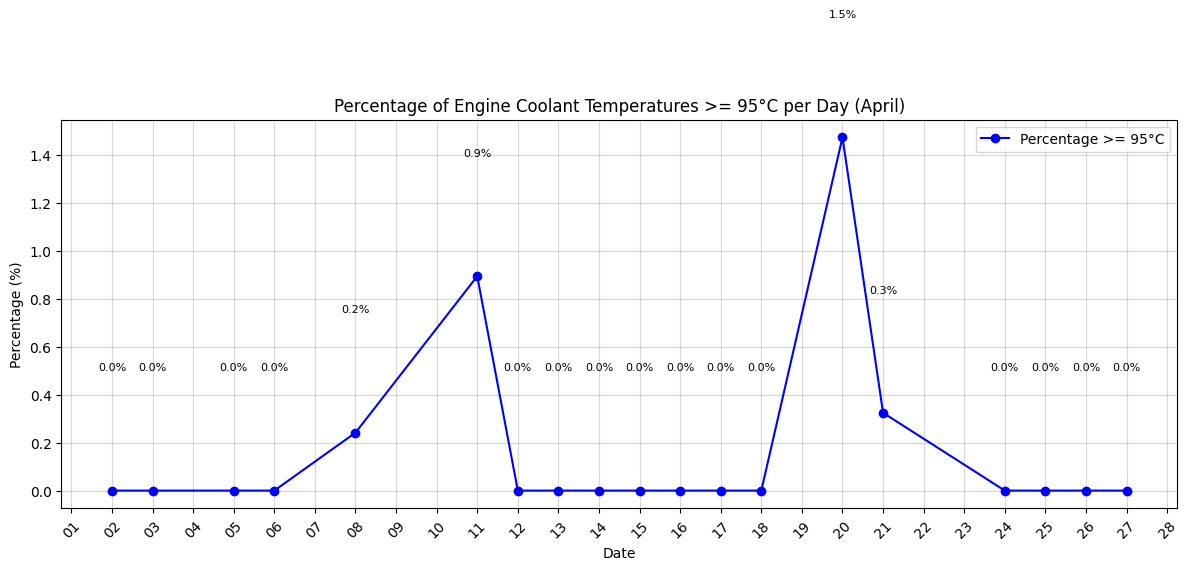

          date  total_Entries  count_over_or_equal_95  \
0   2023-04-02            336                       0   
1   2023-04-03           1339                       0   
2   2023-04-05           2193                       0   
3   2023-04-06           2107                       0   
4   2023-04-08           4142                      10   
5   2023-04-11           3246                      29   
6   2023-04-12            406                       0   
7   2023-04-13            708                       0   
8   2023-04-14            949                       0   
9   2023-04-15           1127                       0   
10  2023-04-16            863                       0   
11  2023-04-17           3003                       0   
12  2023-04-18           1493                       0   
13  2023-04-20            747                      11   
14  2023-04-21           3700                      12   
15  2023-04-24           1878                       0   
16  2023-04-25           1176  

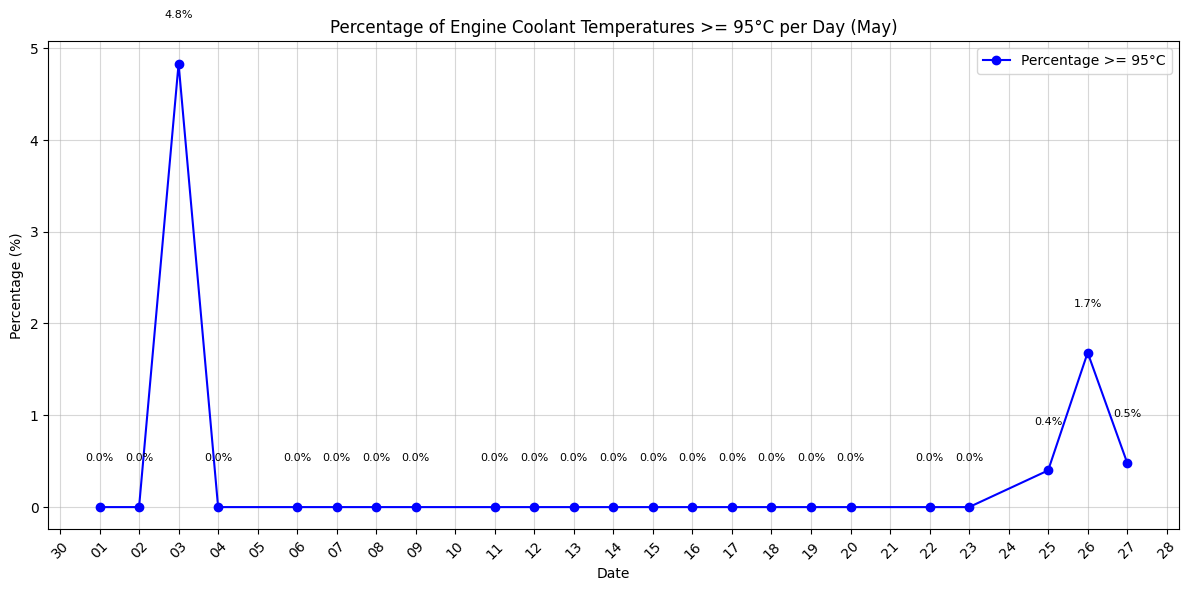

          date  total_Entries  count_over_or_equal_95  \
0   2023-05-01            635                       0   
1   2023-05-02            800                       0   
2   2023-05-03            704                      34   
3   2023-05-04           1201                       0   
4   2023-05-06           1587                       0   
5   2023-05-07           3459                       0   
6   2023-05-08            522                       0   
7   2023-05-09            708                       0   
8   2023-05-11           1412                       0   
9   2023-05-12           1721                       0   
10  2023-05-13             26                       0   
11  2023-05-14            840                       0   
12  2023-05-15           2529                       0   
13  2023-05-16           1190                       0   
14  2023-05-17           4756                       0   
15  2023-05-18            899                       0   
16  2023-05-19           3163  

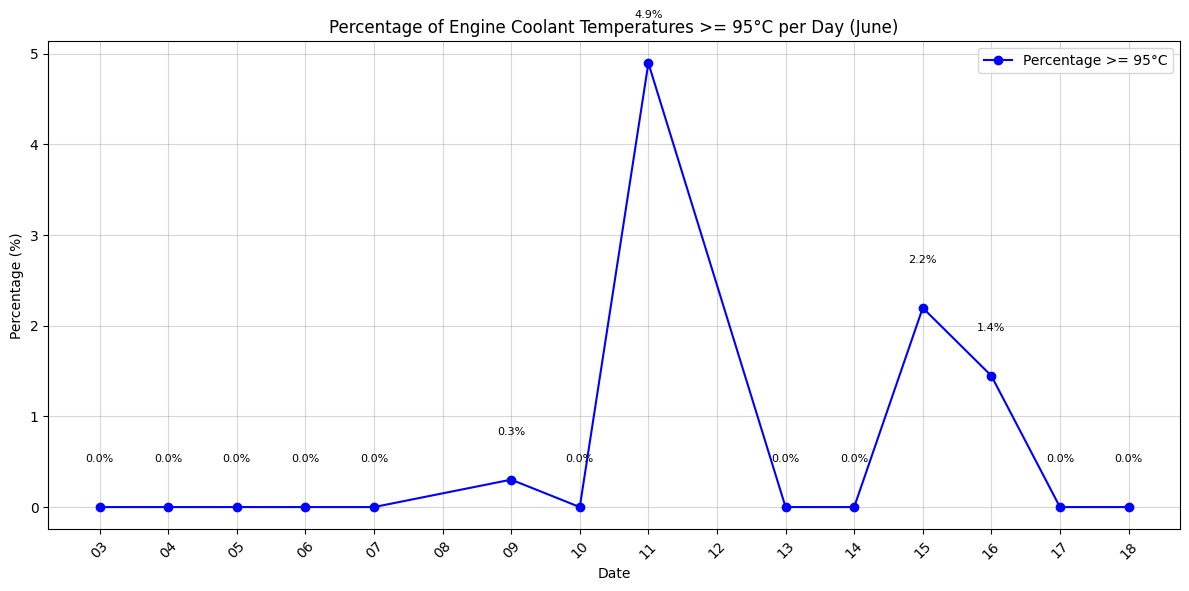

          date  total_Entries  count_over_or_equal_95  \
0   2023-06-03           1134                       0   
1   2023-06-04           3382                       0   
2   2023-06-05            933                       0   
3   2023-06-06           1718                       0   
4   2023-06-07           3603                       0   
5   2023-06-09           3636                      11   
6   2023-06-10           1744                       0   
7   2023-06-11           3493                     171   
8   2023-06-13            744                       0   
9   2023-06-14            513                       0   
10  2023-06-15           6875                     151   
11  2023-06-16           2418                      35   
12  2023-06-17           3203                       0   
13  2023-06-18           1722                       0   

    percentage_over_or_equal_95  
0                      0.000000  
1                      0.000000  
2                      0.000000  
3       

In [8]:
#this code is for day wise (each day of the month)

def daily_percentage(monthly_dataset):

    # Ensure the 'time_stamp' column is datetime type
    monthly_dataset['time_stamp'] = pd.to_datetime(monthly_dataset['time_stamp'])

    # Extract the date for day-wise grouping
    monthly_dataset['date'] = monthly_dataset['time_stamp'].dt.date

    # Extract the name of the month (use the first date in the dataset to determine it)
    first_date = monthly_dataset['time_stamp'].iloc[0]
    month_name = calendar.month_name[first_date.month]

    # Group by date
    daily_data = monthly_dataset.groupby('date').agg(
        total_Entries=('engine_coolant_temperature', 'count'),
        count_over_or_equal_95=('engine_coolant_temperature', lambda x: (x >= 95).sum())
    ).reset_index()

    # Calculate the percentage for each day
    daily_data['percentage_over_or_equal_95'] = (
        daily_data['count_over_or_equal_95'] / daily_data['total_Entries']
    ) * 100


    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(
        daily_data['date'], 
        daily_data['percentage_over_or_equal_95'], 
        marker='o', 
        color='blue', 
        label="Percentage >= 95°C"
    )

    # Annotate each point with the percentage value
    for x, y in zip(daily_data['date'], daily_data['percentage_over_or_equal_95']):
        plt.text(x, y + 0.5, f"{y:.1f}%", ha='center', fontsize=8, color='black')

    # Format the x-axis to show all dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))  # Display only the day of the month
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())           # Show ticks for each day

    plt.xlabel('Date')
    plt.ylabel('Percentage (%)')
    plt.title(f'Percentage of Engine Coolant Temperatures >= 95°C per Day ({month_name})')
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print the daily data for verification
    print(daily_data)


# call the function, give dataset of any month as a perimeter
daily_percentage(dataset_jan)
daily_percentage(dataset_feb)
daily_percentage(dataset_mar)
daily_percentage(dataset_apr)
daily_percentage(dataset_may)
daily_percentage(dataset_jun)